# ◆Logistic Regression - Heart Disease Prediction
### 目的：10年後の心臓病のリスクを予測する
### 10年後心疾患かどうか（TenYearCHD）を目的変数とするロジスティック回帰モデルを構築する
- kaggle URL:https://www.kaggle.com/uciml/mushroom-classification/data
- Create Date：2020/01/08　Author：M.Hasegawa
### ────────────────────────────────────────────────────────────────

### 【手順】

### 0.Notebook内で利用する関数の定義

### 1.データ読込
- 欠損項目を確認する

### 2.データ前処理
- 目的変数を説明するのに有効そうな説明変数を見つける。
- 目的変数と説明変数の関係を確認するためのグラフを作成する。
- 質的変数が扱えない場合は、ダミー変数に置き換える。

### 3.モデル構築
- ロジスティック回帰モデルを利用する
- モデルパラメータ（重み）：$\mathbf{w} = (w_0, w_1, w_2, \dots, w_p)^{\mathrm{T}} $
- モデルへの入力：$\mathbf{x} = (1, x_1, x_2, \dots, x_p)^{\mathrm{T}} $
- 以上の2つが与えられたときのモデルの出力（確率値）：$\hat{Y}(\mathbf{x}; \mathbf{w}) =  f(\mathbf{w}^{\mathrm{T}} \mathbf{x})$
- $f$はシグモイド関数：$f(x) = \frac{1}{1 + \exp(-x)}$

### 4.モデル評価
- 混同行列を作成し、Accuracy、Recall、Precisionを求める

### ※データセット
- 「framingham_heart_disease.csv」（データ数：4,238行16列）

|id|項目|説明|型|
|:---:|:---:|:---:|:---:|
|1|male|性別|2値|
|2|age|年齢|数値|
|3|education|教育|数値|
|4|currentSmoker|喫煙者|2値|
|5|cigsPerDay|1日当たりのタバコ量|数値|
|6|BPMeds|BPMeds|数値|
|7|prevalentStroke|流行性脳卒中|数値|
|8|prevalentHyp|流行|数値|
|9|diabetes|糖尿病|数値|
|10|totChol|totChol|数値|
|11|sysBP|sysBP|数値|
|12|diaBP|diaBP|数値|
|13|BMI|BMI|数値|
|14|heartRate|心拍数|数値|
|15|glucose|グルコース|数値|
|16|TenYearCHD|10年後に心疾患になるかどうか|2値|

## 0.Notebook内で利用する関数の定義

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix,precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler

# 警告非表示
import warnings
warnings.filterwarnings('ignore')

## 1.データ読込

In [16]:
# ****************************************************************************
# ◆ 1.データ読込
# ****************************************************************************
df= pd.read_csv('./framingham_heart_disease.csv')

print("\n▼ サイズ")
display(df.shape)

print("\n▼ 先頭5行表示")
display(df.head(5))

print("\n▼ 基本統計量")
display(df.describe())

print('\n▼ 欠損データ確認')
display(pd.DataFrame(df.isnull().sum()[df.isnull().sum()>0],columns=['Missing num']))


▼ サイズ


(4238, 16)


▼ 先頭5行表示


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0



▼ 基本統計量


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000



▼ 欠損データ確認


,Missing num
education,105
cigsPerDay,29
BPMeds,53
totChol,50
BMI,19
heartRate,1
glucose,388


## 2.データ前処理
### 2-1.目的変数の確認


▼ 目的変数TenYearCHDの種類（%）※10年後心疾患である=1，10年後心疾患でない=0


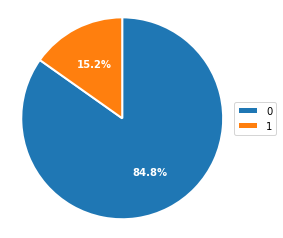

→食用のほうが若干多い

▼ 件数（10年後心疾患である=1，10年後心疾患でない=0）


,TenYearCHD
0,3594
1,644



▼ 10年後の心疾患率
baseline= 0.1519584709768759


In [3]:
# ****************************************************************************
# ◆ 2.前処理
# ****************************************************************************
# ------------------------------------------------
# 2-1.目的変数の確認
# ------------------------------------------------
print('\n▼ 目的変数TenYearCHDの種類（%）※10年後心疾患である=1，10年後心疾患でない=0')
per_class = round(df['TenYearCHD'].value_counts() / len(df['TenYearCHD']) * 100,2)
values = list(per_class.values)

# 円グラフ
plt.figure(figsize=(4,4))
plt.pie(values, labels=list(per_class.index),
        wedgeprops={'linewidth': 2,'edgecolor':'white'},
        textprops={'color': 'white', 'weight': 'bold'},
        counterclock=False,startangle=90,
        autopct=lambda p: '{:.1f}%'.format(p) if p >= 2.5 else '')
lgnd=plt.legend(bbox_to_anchor=(1.0, 0.25, 1.55, 0.5), loc="center left", borderaxespad=0.)
plt.axis('equal')
plt.show()
print('→食用のほうが若干多い')

print('\n▼ 件数（10年後心疾患である=1，10年後心疾患でない=0）')
display(pd.DataFrame(df['TenYearCHD'].value_counts(),columns=['TenYearCHD']))

print('\n▼ 10年後の心疾患率')
baseline = df['TenYearCHD'].mean()
print('baseline=',baseline)

### 2-2.説明変数の前処理

### 2-2-1.欠損値の補完

In [4]:
print('\n▼ 欠損データ確認')
display(pd.DataFrame(df.isnull().sum()[df.isnull().sum()>0],columns=['Missing num']))

# 最頻値で保管
df['education'] = df['education'].fillna(df['education'].median())
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())
df['glucose'] = df['glucose'].fillna(df['glucose'].median())

print('\n▼ 欠損データ確認')
display(pd.DataFrame(df.isnull().sum()[df.isnull().sum()>0],columns=['Missing num']))



▼ 欠損データ確認


,Missing num
education,105
cigsPerDay,29
BPMeds,53
totChol,50
BMI,19
heartRate,1
glucose,388



▼ 欠損データ確認


,Missing num


In [5]:
# ------------------------------------------------
# 2-3-3.カラムの確認
# ------------------------------------------------
print('\n ▼ カラムの型リスト表示 ')

col_list = df.columns.tolist() 
display(df[col_list].dtypes.sort_values()) 

# int64リスト
i_cols = df[col_list].dtypes[df[col_list].dtypes=='int64'].index.tolist()
# float64リスト
f_cols = df[col_list].dtypes[df[col_list].dtypes=='float64'].index.tolist()

# ヒストグラムで確認する項目
col_chk_hist = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# カウントプロットで確認する項目
col_chk_cnt = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


 ▼ カラムの型リスト表示 


male                 int64
age                  int64
currentSmoker        int64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
TenYearCHD           int64
education          float64
cigsPerDay         float64
BPMeds             float64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
dtype: object


▼ 相関係数をヒートマップにして可視化


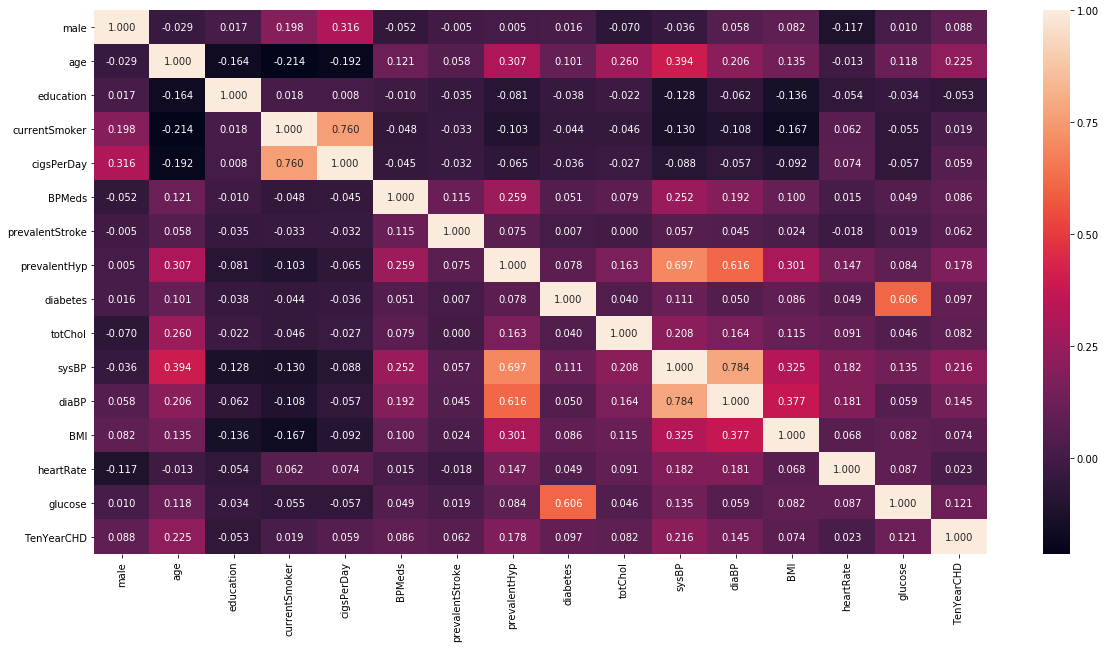

In [6]:
# ------------------------------------------------
# 2-1.説明変数の選定
# ------------------------------------------------
# 散布図行列
#plt.figure(figsize=(10,6))
#sns.pairplot(df, hue="TenYearCHD")
#plt.show()

# ヒートマップ
print('\n▼ 相関係数をヒートマップにして可視化')
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt='1.3f')
plt.show()


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

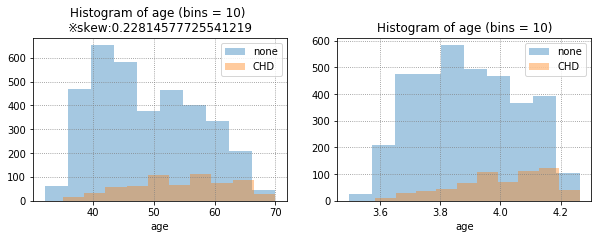


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

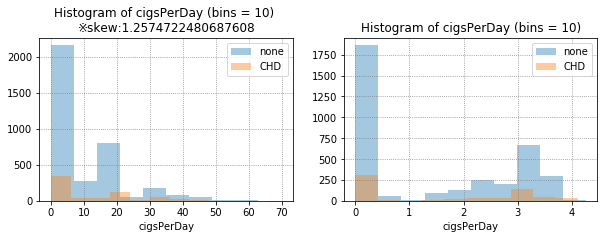


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

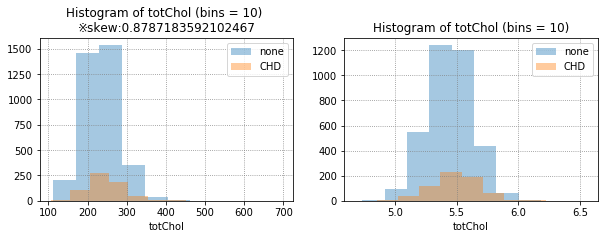


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

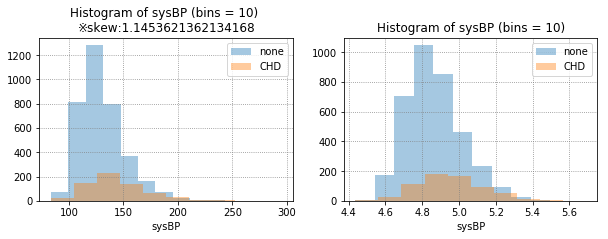


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

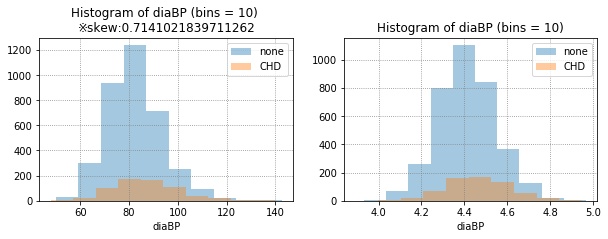


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

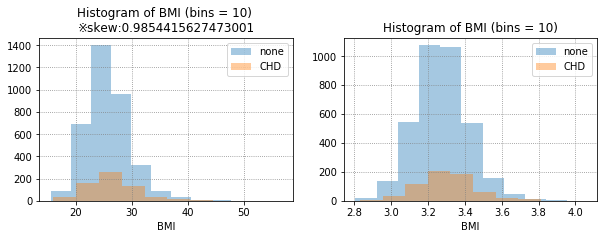


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

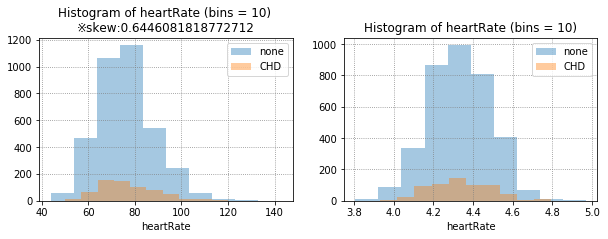


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

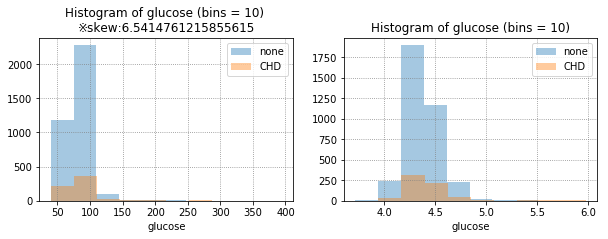

In [7]:
# ------------------------------------------------
# 2-3-3.カテゴリ項目の確認
# ------------------------------------------------    
bins_val = 10
for col_name in col_chk_hist:
    print('\n ──────────────────────────────────────── ')
    plt.subplots_adjust(wspace=2.0, hspace=2.0) # 余白
    plt.figure(figsize=(10,3))
    
    # ヒストグラム
    plt.subplot(1,2,1)
    sns.distplot(df[df['TenYearCHD']==0][col_name],kde=False,rug=False,bins=bins_val,label='none')
    sns.distplot(df[df['TenYearCHD']==1][col_name],kde=False,rug=False,bins=bins_val,label='CHD')
    plt.title('Histogram of ' + str(col_name) + ' (bins = ' + str(bins_val) + ') \n※skew:' + str(df[col_name].skew()))
    plt.grid(which='major',color='gray',linestyle=':')
    plt.grid(which='minor',color='gray',linestyle=':')
    plt.legend()
    
    # 対数ヒストグラム
    plt.subplot(1,2,2)
    sns.distplot(np.log1p(df[df['TenYearCHD']==0][col_name]),kde=False,rug=False,bins=bins_val,label='none')
    sns.distplot(np.log1p(df[df['TenYearCHD']==1][col_name]),kde=False,rug=False,bins=bins_val,label='CHD')
    plt.title('Histogram of ' + str(col_name) + ' (bins = ' + str(bins_val) + ')')
    plt.grid(which='major',color='gray',linestyle=':')
    plt.grid(which='minor',color='gray',linestyle=':')
    plt.xlabel(col_name)
    plt.legend()
    plt.show()



 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

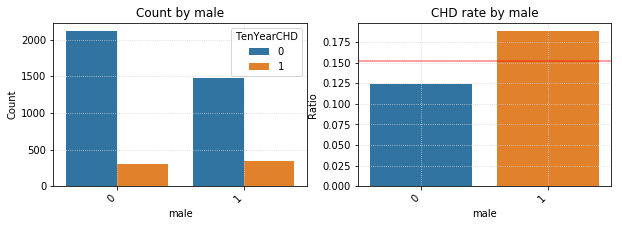


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

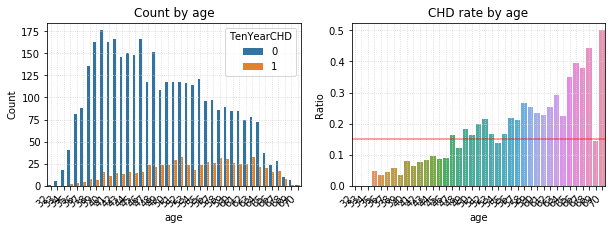


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

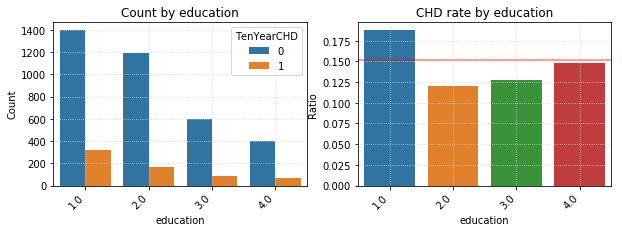


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

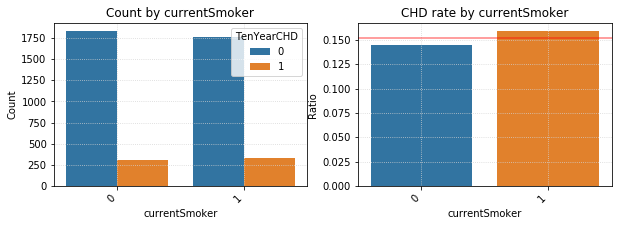


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

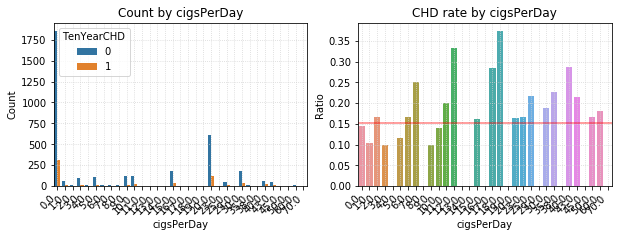


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

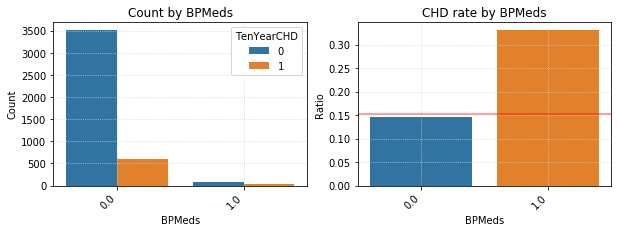


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

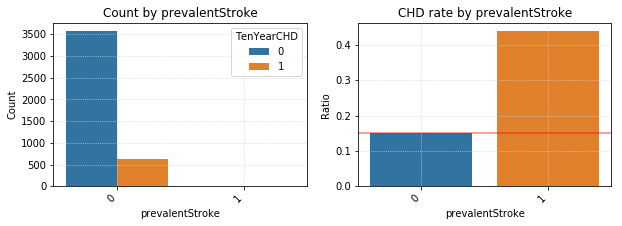


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

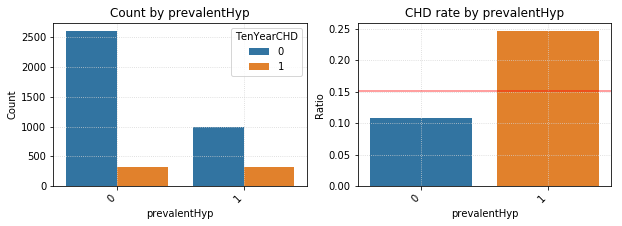


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

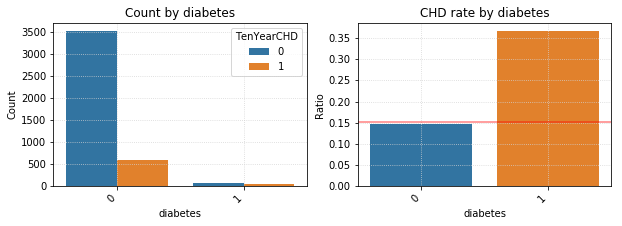

In [8]:
# ------------------------------------------------
# 2-3-3.カテゴリ項目の確認
# ------------------------------------------------    
for col_name in col_chk_cnt:
    print('\n ──────────────────────────────────────── ')
    plt.subplots_adjust(wspace=2.0, hspace=2.0) # 余白
    plt.figure(figsize=(10,3))
    
    # カウントプロット
    plt.subplot(1,2,1)
    ax = sns.countplot(df[col_name],hue=df['TenYearCHD'])
    ax.set_title('Count by ' + str(col_name))
    plt.grid(which='major',color='lightgray',linestyle=':')
    plt.grid(which='minor',color='lightgray',linestyle=':')
    ax.set_xlabel(col_name)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") # ラベルの回転
    ax.set_ylabel('Count')
    
    # 心疾患率プロット
    plt.subplot(1,2,2)
    eat_rate = pd.DataFrame(df['TenYearCHD'].groupby(df[col_name]).mean())
    eat_rate.reset_index(inplace = True) # index振り直し
    ax = sns.barplot(x=col_name, y="TenYearCHD", data=eat_rate)
    ax.axhline(baseline, alpha=0.5, color='red') # 平均値
    ax.set_title('CHD rate by ' + str(col_name))
    plt.grid(which='major',color='lightgray',linestyle=':')
    plt.grid(which='minor',color='lightgray',linestyle=':')
    ax.set_xlabel(col_name)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") # ラベルの回転
    ax.set_ylabel('Ratio')
    plt.show()

## 3.モデル構築


▼ 重みを表示（絶対値の降順：Top10）


,feature,weight
0,age,0.659333
1,prevalentStroke,0.419837
2,glucose,0.413954
3,sysBP,0.378642
4,male,0.376446
5,education,-0.317601
6,totChol,0.252742
7,diaBP,-0.250400
8,heartRate,-0.234783
9,diabetes,0.227101



▼ 重みの大きさを横棒グラフで表示


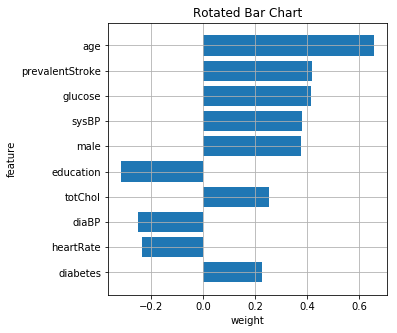

In [11]:
# ****************************************************************************
# ◆ 3.モデル構築
# ****************************************************************************
# ------------------------------------------------
# 3-1.モデルを生成して学習する  
# ------------------------------------------------
X = df.drop('TenYearCHD', axis=1).values # 説明変数
y = df['TenYearCHD'].values              # 目的変数

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

scaler = StandardScaler()

# データを標準化
X_train_norm = X_train
X_test_norm = X_test

# 先頭4列を標準化
X_train_norm[:,:] = scaler.fit_transform(X_train[:,:])
X_test_norm[:,:] = scaler.transform(X_test[:,:])

# ロジスティック回帰モデル生成
clf = SGDClassifier(loss='log',           # ロジスティック回帰を指定
                    penalty='none',       # 正則化を入れる場合はL1､L2→Day2で実施
                    max_iter=10000,       # 繰り返し計算時の強制的終了値、誤差が収束すれば利用しない。
                    fit_intercept=True,   # 切片を有効にするかどうか
                    random_state=1234,    # 乱数のシード
                    tol=1e-3              # 収束する誤差の指定
                   )

# 学習
clf.fit(X_train_norm, y_train)

#print('w0 = {:.3f}'.format(clf.intercept_[0]))

# 結果をDataFrameへ格納
res_df = pd.DataFrame(columns=['feature','weight','abs_w'])
res_df['feature'] = list(df.drop('TenYearCHD', axis=1).columns)
res_df['weight'] = np.reshape(clf.coef_[0], -1).tolist() # 重み
res_df['abs_w'] = abs(res_df['weight']) # 絶対値

# 重みの絶対値の降順ソート
print('\n▼ 重みを表示（絶対値の降順：Top10）')
res_df = res_df.sort_values('abs_w', ascending=False)
res_df.reset_index(drop=True,inplace=True)
res_df = res_df.drop('abs_w', axis=1)
res_df_head = res_df.head(10)
display(res_df_head.head(10))

# 重みの大きさを横棒グラフで表示
print('\n▼ 重みの大きさを横棒グラフで表示')
plt.figure(figsize=(5, 5))
plt.barh(np.arange(len(res_df_head['feature']))[::-1], res_df_head['weight'], align='center')
plt.yticks(np.arange(len(res_df_head['feature']))[::-1], res_df_head['feature'])
plt.title('Rotated Bar Chart')
plt.xlabel('weight')
plt.ylabel('feature')
plt.grid()
plt.show()


## 4.モデル評価

In [13]:
# ****************************************************************************
# ◆ 4.モデル評価
# ****************************************************************************
# ------------------------------------------------
# 4-1.モデル検証  
# ------------------------------------------------
y_est = clf.predict(X_test)

print('\n▼ モデルの予測結果(先頭10件)')
print(y_est[:11])

# 予測確率を出力
print('\n▼ 結果の予測確率(先頭10件)\n(10年後CHDでない確率：10年後CHDである確率):')
print(clf.predict_proba(X_test)[:11])

# ------------------------------------------------
# 4-2.モデル評価結果
# ------------------------------------------------
print('\n▼ モデルの評価結果')

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(- log_loss(y_test, y_est)))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y_test, y_est)))

# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_est)

# 食用に関するPrecision, Recall, F1-scoreを表示
print('適合率（Precision※精度) = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall※検出率) = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

# 予測値と正解のクロス集計
print('\n▼ 混同行列')
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_est), 
                        index=['正解 = 10年後CHDでない', '正解 =10年後CHDである'], 
                        columns=['予測 = 10年後CHDでない', '予測 = 10年後CHDである'])

display(conf_mat)


▼ モデルの予測結果(先頭10件)
[0 0 0 0 0 0 0 0 0 0 0]

▼ 結果の予測確率(先頭10件)
(10年後CHDでない確率：10年後CHDである確率):
[[0.86720148 0.13279852]
 [0.79273781 0.20726219]
 [0.96459776 0.03540224]
 [0.79416842 0.20583158]
 [0.93496152 0.06503848]
 [0.88817717 0.11182283]
 [0.67863543 0.32136457]
 [0.90160919 0.09839081]
 [0.65038263 0.34961737]
 [0.88439838 0.11560162]
 [0.81493399 0.18506601]]

▼ モデルの評価結果
対数尤度 = -5.417
正答率 = 84.316%
適合率（Precision※精度) = 86.403%
再現率（Recall※検出率) = 96.814%
F1値（F1-score） = 91.313%

▼ 混同行列


,予測 = 10年後CHDでない,予測 = 10年後CHDである
正解 = 10年後CHDでない,699,23
正解 =10年後CHDである,110,16
